In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [120]:
df = pd.read_csv('/content/drive/MyDrive/ybigta/교육세션/0202 시각화/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
group = df.groupby(['SibSp', 'Parch'])
group.Fare.mean()

SibSp  Parch
0      0         21.242689
       1         73.470400
       2         45.255455
       3         19.258300
       4         21.075000
       5         34.406250
1      0         42.610402
       1         36.379751
       2         71.615137
       3         30.583333
       4        106.266667
       5         31.312500
       6         46.900000
2      0         41.411200
       1         24.896414
       2        148.375000
       3         18.750000
3      0         18.425000
       1         23.584543
       2        128.657143
4      1         34.993056
       2         28.718056
5      2         46.900000
8      2         69.550000
Name: Fare, dtype: float64

In [137]:
fares_by_group = []
survival_by_group = []

for index, g in group:
  fares_by_group.append((g.Fare.values - g.Fare.mean()) / g.Fare.std())
  survival_by_group.append(g.Survived.values)

fares_normalized = np.concatenate(fares_by_group)[:, np.newaxis]
survival = np.concatenate(survival_by_group)[:, np.newaxis]
data = np.concatenate((fares_normalized, survival), axis = 1)

df_data = pd.DataFrame(data, columns = ['Fare','Survival'])

<ipython-input-137-40e81fe6d103>:5: RuntimeWarning: invalid value encountered in true_divide
  fares_by_group.append((g.Fare.values - g.Fare.mean()) / g.Fare.std())


<Figure size 1440x720 with 0 Axes>

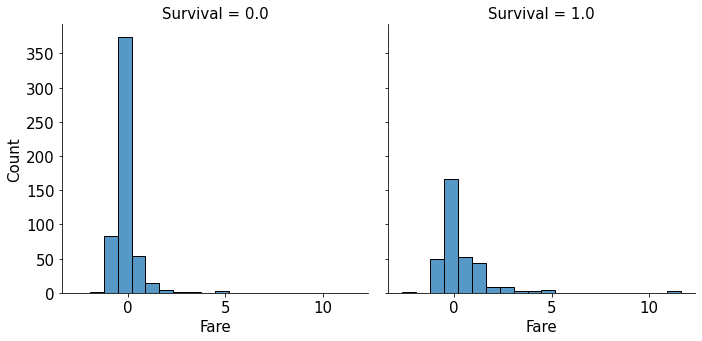

In [140]:
plt.figure(figsize = (20,10))
plt.rc('font', size = 15)
plot = sns.displot(data = df_data, x = 'Fare', kind = 'hist', col = 'Survival',  bins = 20)

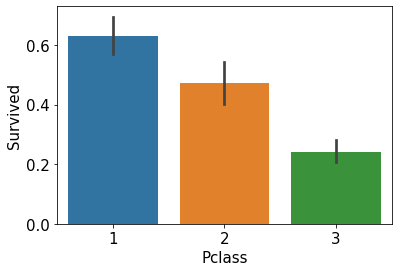

In [135]:
sns.barplot(x = df.Pclass, y = df.Survived)